In [23]:
import numpy as np
from keras_core.models import Sequential
from keras_core.layers import Dense, LSTM, Embedding
from keras_core.preprocessing.sequence import pad_sequences
from keras_preprocessing.text import Tokenizer
from keras_core.utils import to_categorical


In [24]:


texts = [
  'Bu harika bir kitap',
  'Bu film çok sıkıcı',
  'Çok eğlenceli bir deneyimdi'
]

labels = [1,0,1] # 1 Pozitif, 0 Negatif

# Metinleri sayılara dönüştürmek için bir tokenizer oluştur
tokenizer = Tokenizer()

# metinleri sayılara dönüştürmek için tokenizer oluştur
tokenizer.fit_on_texts(texts)
word_index = tokenizer.word_index

In [25]:
# metinleri sayı dizilerine dönüştürüp sabit bir uzunluk elde etme
sequences = tokenizer.texts_to_sequences(texts)
max_sequence_length = max(len(seq) for seq in sequences)
padded_sequences = pad_sequences(sequences, maxlen = max_sequence_length)

In [26]:
# etiketleri kategorik hale getir

one_hot_labels = to_categorical(labels)

In [27]:
# model oluşturma
model = Sequential()
model.add(Embedding(input_dim=len(word_index) + 1, output_dim=100))
model.add(LSTM(128))
model.add(Dense(2, activation='softmax'))

In [28]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(padded_sequences, one_hot_labels, epochs= 10, batch_size=32)

Epoch 1/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.0000e+00 - loss: 0.7019
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.6667 - loss: 0.6896
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.6667 - loss: 0.6776
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.6667 - loss: 0.6656
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 1.0000 - loss: 0.6534
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 1.0000 - loss: 0.6409
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 1.0000 - loss: 0.6276
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - accuracy: 1.0000 - loss: 0.6134
Epoch 9/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 1.0000 - loss: 0.5982
Epoch 10/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 1.0000 - loss: 0.5817


In [29]:
new_texts = ['harika bir film!', 'bu kitap sıkıcı.', "eğlenceli"]
new_sequences= tokenizer.texts_to_sequences(new_texts)
new_padded_sequences = pad_sequences(new_sequences, maxlen=max_sequence_length)
predictions = model.predict(new_padded_sequences)
print(predictions)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step
[[0.4423264  0.55767363]
 [0.47083348 0.5291665 ]
 [0.45088002 0.54911995]]


In [39]:
import gym 
import numpy as np
import random 
import matplotlib.pyplot as plt


In [51]:
env = gym.make('FrozenLake-v1')

env

<TimeLimit<OrderEnforcing<PassiveEnvChecker<FrozenLakeEnv<FrozenLake-v1>>>>>

In [45]:
q_table = np.zeros([env.observation_space.n, env.action_space.n])
q_table


array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

In [46]:
# Hyperparameter
gamma = 0.95
alpha = 0.80
epsilion = 0.10

# ödülleri görselleştirmek için bir liste oluştur
reward_list = []

In [49]:
# öğrenmeye başla

episode_number = 100000 
for i in range(1, episode_number):
  state = env.reset() # her bölüm başında ortamı resetle
  
  reward_count = 0
  while True:
    
    #%10 = keşif, %90 sömürü oranı
    if random.uniform(0,1) < epsilion:
      action = env.action_space.sample()
    else:
      action = np.argmax(q_table[state])
      
      # ortam içerisinde bir eylem yap, karşılığında bir sonraki durumu ver
      next_state, reward, done, _ = env.step(action)
      
      # Q öğrenme fonksiyonu
      old_value = q_table[state, action] # old value
      next_max = np.max(q_table[next_state]) # next_max
      
      next_value = (1-alpha)*old_value + alpha*(reward + gamma*next_max)
      
      # Q tablosu güncelle 
      q_table[state, action] = next_value
      
      # durum güncelle 
      state = next_state
      
      # toplam ödülü hesapla
      reward_count += reward
      
      # eğer bölüm bittiyse kır ve yeni bölüme başla
      
      if done:
        break
      if i%5000 == 0:
        print("Episode: {}".format(i))
      if i%1000 == 0:
        reward_list.append(reward_count)

  

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [8]:
import pandas as pd 
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# makine öğrenmesi
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier, NeighborhoodComponentsAnalysis, LocalOutlierFactor
from sklearn.decomposition import PCA


import warnings
warnings.filterwarnings('ignore')

In [9]:
veri = pd.read_csv("../data/data1/canser.csv")
veri.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [10]:
# gereksiz verileri çıkarma
veri.drop(['Unnamed: 32', 'id'], inplace=True, axis=1)

In [11]:
veri = veri.rename(columns= {"diagnosis": 'hedef'}) 

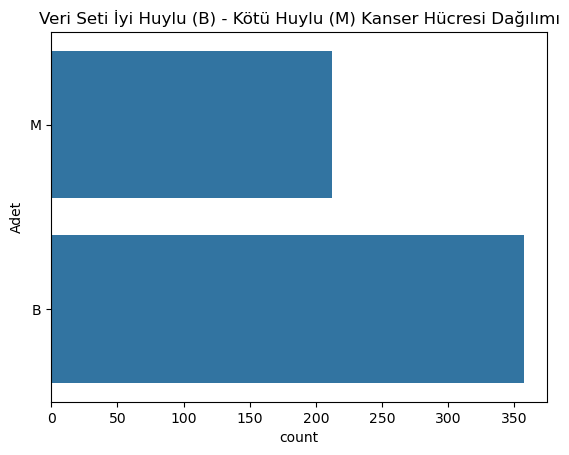

hedef
B    357
M    212
Name: count, dtype: int64


In [12]:
# veri içerisinde bulunan hastalık dağılımı 
plt.figure()
sns.countplot(veri["hedef"])
plt.ylabel("Adet")
plt.title("Veri Seti İyi Huylu (B) - Kötü Huylu (M) Kanser Hücresi Dağılımı")
plt.show()
print(veri.hedef.value_counts())

In [13]:
# iyi kötü 1 ve 0 lara ayırıyoruz 
# M ise 1, B ise 0
veri["hedef"] = [1 if i.strip() == "M" else 0 for i in veri.hedef]
veri.head(3)

,hedef,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758


In [15]:
print("verinin uzunluğu", len(veri))

verinin uzunluğu 569


In [16]:
print("verinin şekli", veri.shape)

verinin şekli (569, 31)


In [18]:
veri.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   hedef                    569 non-null    int64  
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

In [19]:
veri.describe()

,hedef,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,0.372583,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,0.483918,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,0.000000,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,0.000000,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,0.000000,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,1.000000,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,1.000000,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


<Figure size 1200x800 with 0 Axes>

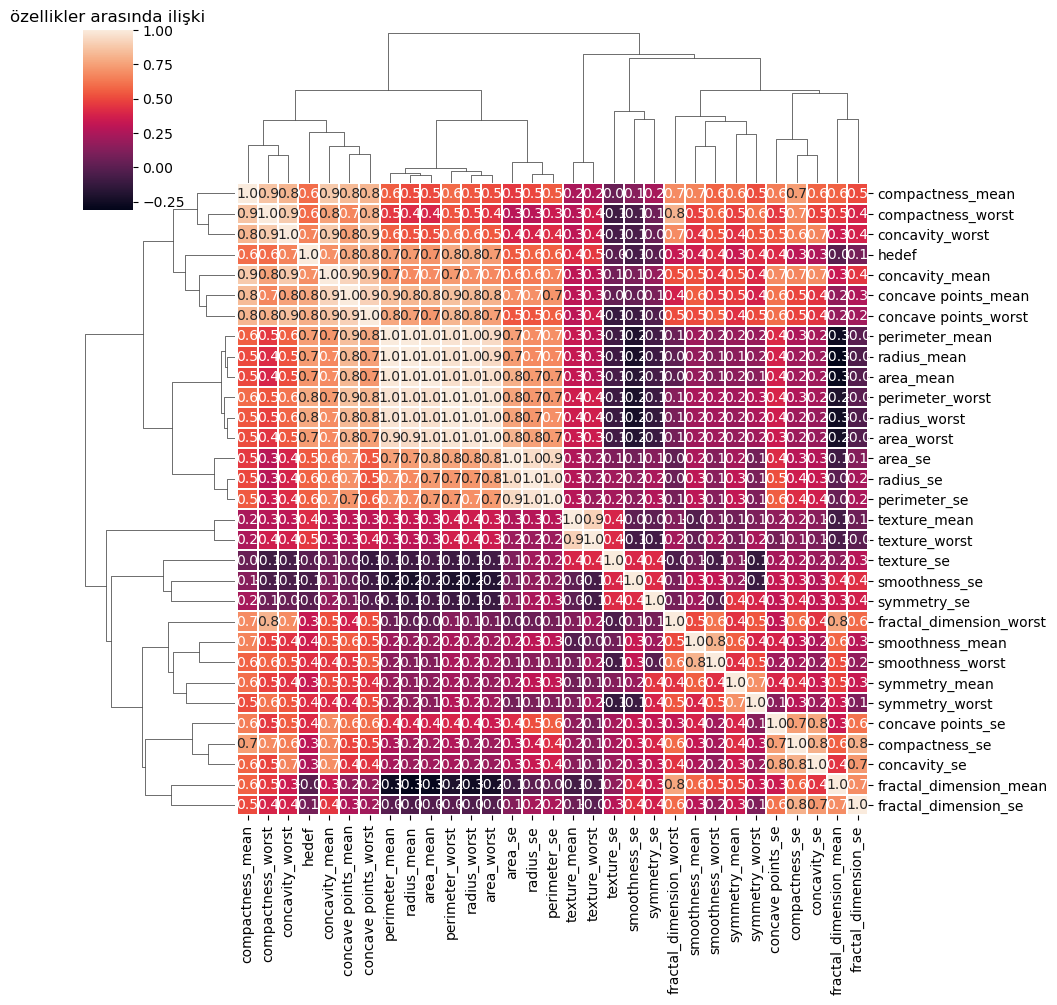

In [20]:
 # hedef ve diğer özellikler arasında bulunan ilişkinin incelenmesi 
 
corr_matrix = veri.corr()
plt.figure(figsize=(12,8))
sns.clustermap(corr_matrix, annot = True, fmt = ".1f", linewidths=.01)
plt.title("özellikler arasında ilişki")
plt.show()

<Figure size 640x480 with 0 Axes>

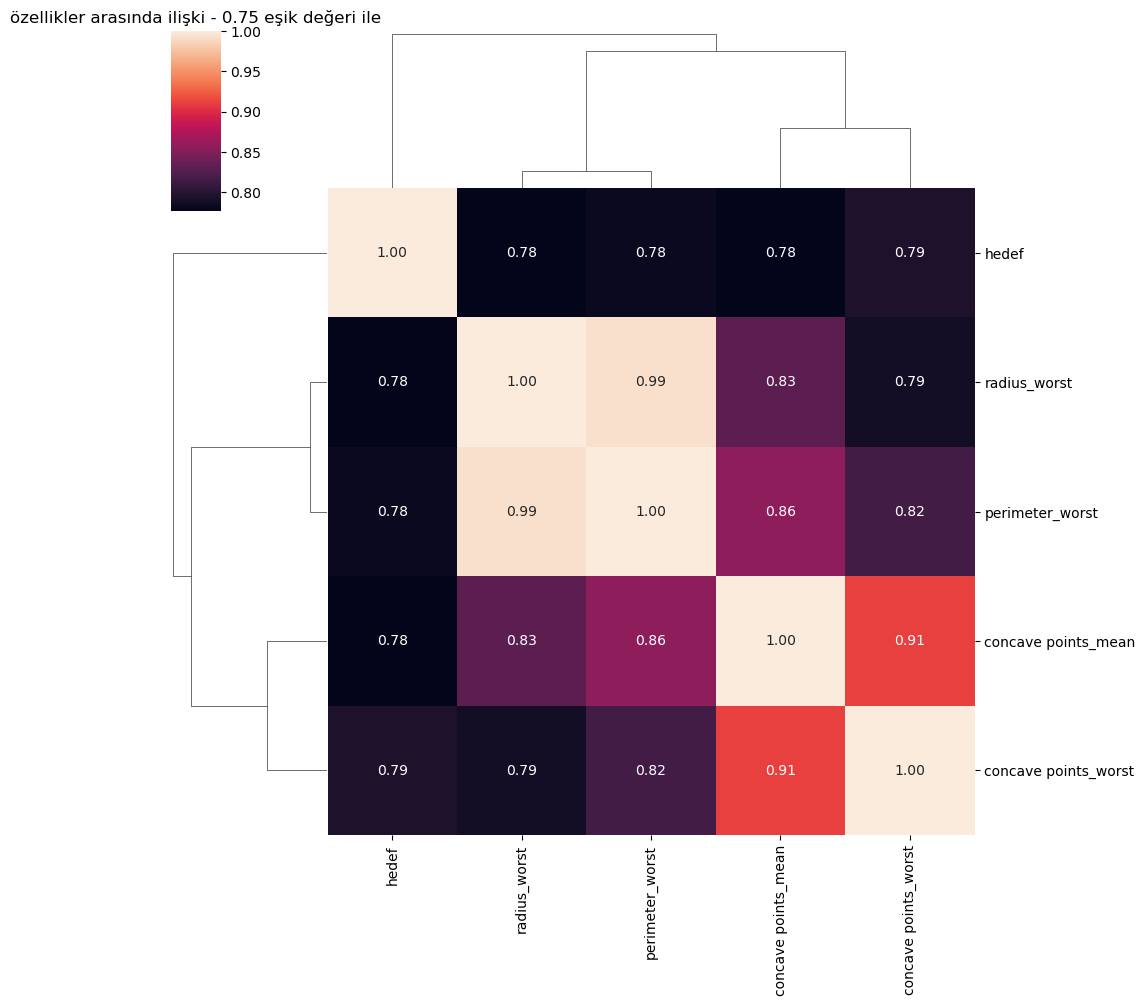

In [21]:
# hedef ile arasındaki ilişki artı/eksi 0.75 den büyük olanları ayrıca göz atma
threshold = 0.75
filtre = np.abs(corr_matrix["hedef"]) > threshold
corr_features = corr_matrix.columns[filtre].tolist()
plt.figure()
sns.clustermap(veri[corr_features].corr(), annot = True, fmt=".2f")
plt.title("özellikler arasında ilişki - 0.75 eşik değeri ile")
plt.show()

<Figure size 640x480 with 0 Axes>

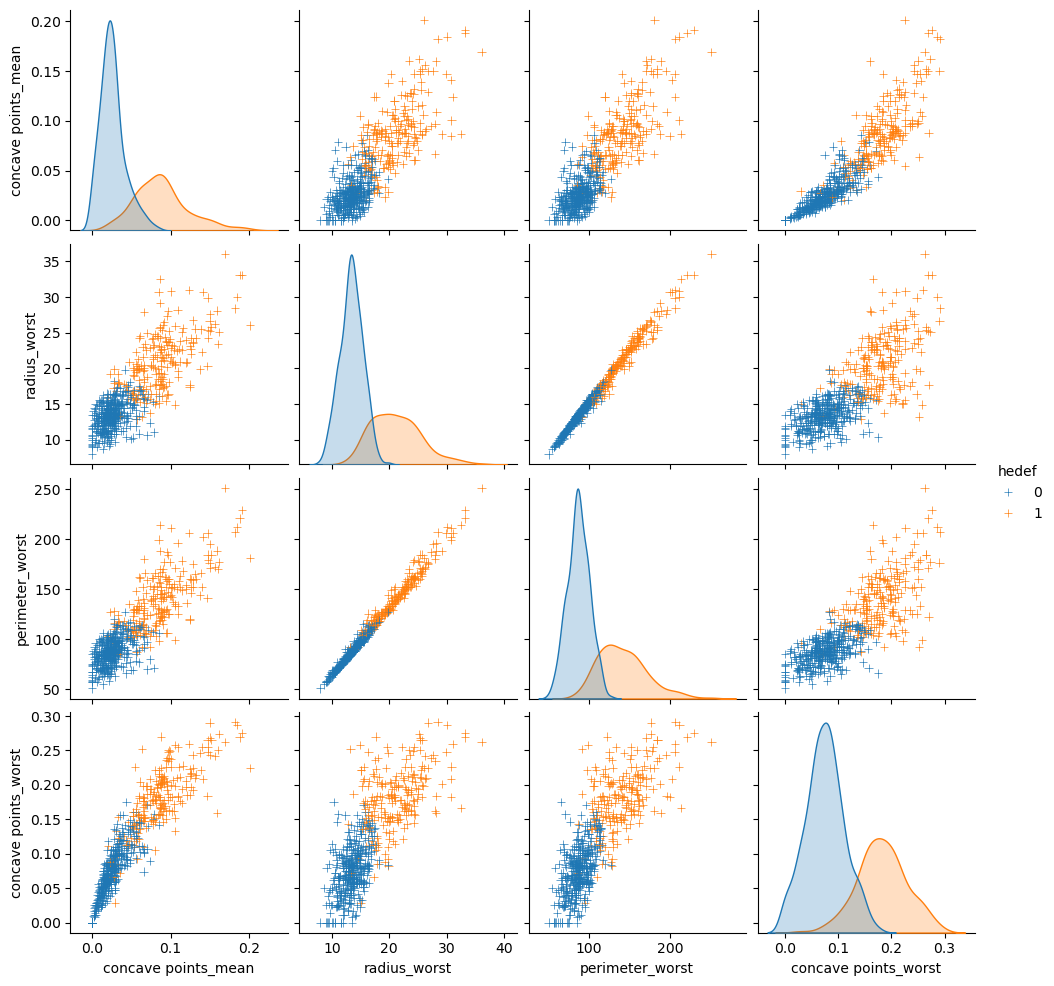

In [22]:
# hedef ile ilişkili özelliklerin saçılımı

plt.figure()
sns.pairplot(veri[corr_features], diag_kind="kde", markers="+", hue="hedef")
plt.show()

In [28]:
# aykırı değerleri bulma

#veriyi x (bağımsız değişkenler) ve y (bağımlı değişken) olmak üzere ikiye bölelim
x = veri.hedef
y = veri.drop(["hedef"], axis= 1)
columns = x.tolist()

In [34]:
x

0      1
1      1
2      1
3      1
4      1
      ..
564    1
565    1
566    1
567    1
568    0
Name: hedef, Length: 569, dtype: int64